## List of results
### Original dataset
1. A table with comparision of all metrics (pre, recall, f1) for all models on the orignal dataset
2. A figure with comparision of all metrics (pre, recall, f1) for all models on the orignal dataset
3. A confusion matix of the best model
4. The classificaiton report of the best model

### Augmented dataset
1. A table with comparision of all metrics (pre, recall, f1) for all models on the Augmented dataset
2. A figure with comparision of all metrics (pre, recall, f1) for all models on the Augmented dataset
3. A confusion matix of the best model
4. The classificaiton report of the best model


   

In [95]:
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

from sklearn.metrics import classification_report,confusion_matrix

In [96]:
files_orig = glob.glob('all_model_original/*.csv')
files_aug =  glob.glob('all_model_augmented/*.csv')

## confusion matrix for original and augmented


In [42]:
vit_orig = "all_model_original/org-ViTpatch16-result.csv"
vit_aug = "all_model_augmented/aug-ViTpatch16-result.csv"

In [44]:
class_names = ['Algae',
 'Major crack',
 'Minor crack',
 'Peeling',
 'Normal',
 'Spalling',
 'Stain']

In [1]:
df_orig = pd.read_csv(vit_orig)
df_aug = pd.read_csv(vit_aug)
conf_mat_original = confusion_matrix(df_orig.actual, df_orig.predicted)
conf_mat_aug = confusion_matrix(df_aug.actual, df_aug.predicted, target_names=class_names)


In [55]:
cm = pd.DataFrame(conf_mat_original)
cm.columns = class_names
cm.index = class_names
cm

,Algae,Major crack,Minor crack,Peeling,Normal,Spalling,Stain
Algae,118,3,0,0,0,0,3
Major crack,0,99,17,0,0,0,0
Minor crack,0,7,117,0,0,0,0
Peeling,0,2,2,95,0,2,3
Normal,0,1,0,0,119,0,0
Spalling,0,1,1,4,0,91,3
Stain,1,0,2,0,0,2,99


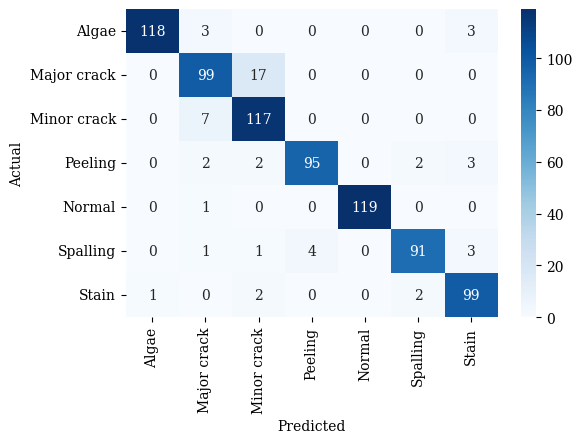

In [71]:
plt.rcParams.update({'font.size': 10})
plt.rcParams["font.family"] = "serif"

import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xticks(rotation=90)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.title('Confusion Matrix')
plt.savefig('curat_vt_confusion_matrix.png')
plt.savefig("vit-cm.pdf", bbox_inches='tight')
plt.show()

In [41]:
conf_mat_aug

array([[399,   1,   0,   0,   0,   0,   0],
       [  0, 382,  15,   3,   0,   0,   0],
       [  0,   2, 397,   0,   1,   0,   0],
       [  0,   2,   0, 397,   0,   1,   0],
       [  0,   0,   1,   0, 397,   0,   2],
       [  0,   2,   0,   3,   0, 395,   0],
       [  0,   1,   0,   0,   0,   0, 399]])

## original dataset model results


In [74]:
result_orig = []
for f in files_orig:
    #print(f)
    df = pd.read_csv(f)
    res = classification_report(df.actual, df.predicted, output_dict=True)

    f1 = res['weighted avg']
    res_score = pd.DataFrame([f1])
    res_score['model'] = os.path.basename(f).split('-')[1]
    result_orig.append(res_score)
    #print(f1)

res_df = pd.concat(result_orig)

#4 decimal points
res_df = res_df.round(4)
res_df

,precision,recall,f1-score,support,model
0,0.8409,0.8359,0.8363,792.0,VGG16
0,0.9342,0.9318,0.9323,792.0,ViTpatch16
0,0.8842,0.8801,0.8803,792.0,AlexNet
0,0.8320,0.8308,0.8301,792.0,ResNet18
0,0.8479,0.8422,0.8419,792.0,MobileNetV2


In [24]:
#save results in csv
res_df.set_index(['model']).drop(['support'], axis=1).to_csv('orig_results.csv')

In [25]:
#for latex
res1 = pd.read_csv('orig_results.csv')
res1 = res1.set_index(['model'])
res1.to_latex('orig_results.tex')
# res1

In [102]:
df_sorted.index = ['ViT', 'AlexNet', 'MobileNetV2', 'VGG16', 'ResNet18']
df_sorted.columns = ['Precision', 'Recall', 'F1-score']
df_sorted


,Precision,Recall,F1-score
ViT,0.9342,0.9318,0.9323
AlexNet,0.8842,0.8801,0.8803
MobileNetV2,0.8479,0.8422,0.8419
VGG16,0.8409,0.8359,0.8363
ResNet18,0.8320,0.8308,0.8301


In [93]:
plt.rcParams.update({'font.size': 10})
plt.rcParams["font.family"] = "serif"

# Read the CSV file and set the index
df = pd.read_csv('orig_results.csv')
df = df.set_index('model')

# Sort the DataFrame based on the mean of the metrics (or any specific metric)
df_sorted = df.sort_values(by=df.columns.tolist(), ascending=False)

df_sorted.index = ['ViT', 'AlexNet', 'MobileNetV2', 'VGG16', 'ResNet18']
df_sorted.columns = ['Precision', 'Recall', 'F1-score']

# Set the backend for matplotlib
matplotlib.use('AGG')

# Create the bar chart
fig, ax = plt.subplots(figsize=(6, 3.5))
df_sorted.plot(kind='bar', ax=ax, color=['cornflowerblue', 'dimgrey', 'lightseagreen'])

# Set labels and formatting
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.tick_params(axis='x', rotation=0)
#ax.set_ylim(0.7, df_sorted.max().max() * 1.05)  # Adjust y-axis limits
ax.set_ylim(0.7, 1)  # Adjust y-axis limits

# Customize the legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=len(df_sorted.columns), fancybox=True, shadow=True)
legend.get_frame().set_linewidth(0)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
plt.savefig('orig-results.pdf')

/tmp/ipykernel_1466558/163140650.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [88]:
!pwd

/home/user/Desktop/praveen/1_Building-monitering/model-run


In [54]:
df_best_orig = pd.read_csv("all_model_original/org-ViTpatch16-result.csv")

In [55]:
# confusion matrix of best model
conf_mat = pd.crosstab(df_best_orig['actual'], df_best_orig['predicted'], rownames=['Actual'], colnames=['Predicted'])

# confusion matrix to LaTeX code
conf_mat.to_latex('orig_confu.tex')

In [57]:
# Load the CSV file

orig_report_best = classification_report(df_best_orig['actual'], df_best_orig['predicted'], output_dict=True)

# class names 
class_names = list(orig_report_best.keys())
class_names.remove('accuracy')
class_names.remove('macro avg')
class_names.remove('weighted avg')

#classification report to LaTeX format
report_df = pd.DataFrame(orig_report_best).T
report_df.to_latex('orig_best_report.tex', index=True)

In [ ]:
conf_mat = confusion_matrix(all_labels, all_preds)

## Augmented dataset report

In [3]:
result_aug = []
for f in files_aug:
    #print(f)
    df = pd.read_csv(f)
    res = classification_report(df.actual, df.predicted, output_dict=True)

    f1 = res['weighted avg']
    res_score = pd.DataFrame([f1])
    res_score['model'] = os.path.basename(f).split('-')[1]
    result_aug.append(res_score)
    #print(f1)

res_df = pd.concat(result_aug)
res_df = res_df.round(4)
res_df

,precision,recall,f1-score,support,model
0,0.8832,0.8818,0.8817,2800.0,ResNet18
0,0.9880,0.9879,0.9879,2800.0,ViTpatch16
0,0.9066,0.9057,0.9056,2800.0,VGG16
0,0.9399,0.9389,0.9391,2800.0,AlexNet
0,0.8756,0.8750,0.8746,2800.0,MobileNetV2


In [4]:
#save results in csv
res_df.set_index(['model']).drop(['support'], axis=1).to_csv('aug_results.csv')

In [69]:
#for latex
res1 = pd.read_csv('aug_results.csv')
res1 = res1.set_index(['model'])
res1.to_latex('aug_results.tex')
# res1

In [70]:
# Read the CSV file and set the index
df = pd.read_csv('aug_results.csv')
df = df.set_index('model')

# Sort the DataFrame based on the mean of the metrics (or any specific metric)
df_sorted = df.sort_values(by=df.columns.tolist(), ascending=False)

# Set the backend for matplotlib
matplotlib.use('AGG')

# Create the bar chart
fig, ax = plt.subplots(figsize=(6, 4))
df_sorted.plot(kind='bar', ax=ax, color=['cornflowerblue', 'dimgrey', 'lightseagreen'])

# Set labels and formatting
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Matrices', fontweight='bold')
ax.tick_params(axis='x', rotation=0)
ax.set_ylim(0.6, df_sorted.max().max() * 1.05)  # Adjust y-axis limits

# Customize the legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=len(df_sorted.columns), fancybox=True, shadow=True)
legend.get_frame().set_linewidth(0)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [71]:
plt.savefig('aug_mat_bar.pdf')

In [14]:
df_best_aug = pd.read_csv("all_model_augmented/aug-ViTpatch16-result.csv")

In [13]:
# confusion matrix of best model
conf_mat = pd.crosstab(df_best_aug['actual'], df_best_aug['predicted'], rownames=['Actual'], colnames=['Predicted'])

# confusion matrix to LaTeX code
conf_mat.to_latex('aug_confu.tex')

In [73]:
# #classification report fro best model
# aug_report_best = classification_report(df_best_orig['actual'], df_best_orig['predicted'], target_names=class_names)

In [16]:
# Load the CSV file

aug_report_best = classification_report(df_best_aug['actual'], df_best_aug['predicted'], output_dict=True)

# class names 
class_names = list(aug_report_best.keys())
class_names.remove('accuracy')
class_names.remove('macro avg')
class_names.remove('weighted avg')

#classification report to LaTeX format
report_df = pd.DataFrame(aug_report_best).T
report_df.to_latex('aug_best_report.tex', index=True)

In [74]:
# Split the classification report
report_lines = aug_report_best.split('\n')
#class names from the report lines
class_names = []
for line in report_lines[1:-3]:
    if line.strip():
        class_names.append(line.split()[0])
        

# LaTeX format
report_df = pd.DataFrame([line.split() for line in report_lines[1:-3]])
report_df.columns = report_df.iloc[0]
report_df = report_df[1:]
report_df.to_latex('aug_class_report.tex', index=False, header=False)

## confusion matrix

In [1]:
conf_mat = confusion_matrix(all_labels, all_preds)